# Homework 12

## ASTR 5900, Fall 2017, University of Oklahoma

### Neural Networks

# Problem 1

Imagine a neural network that has already been trained to classify configurations of classical spins in a lattice as 1 of 2 magnetic phases: ferromagnetic or paramagnetic.  A training set was generated using Monte Carlo at a range of temperatures, and the target classifications were determined based on their temperatures relative to the known critical temperature for the 2D ferromagnetic Ising model with Hamiltonian $$ H = -J\sum_{\langle i,j \rangle} \sigma^z_i \sigma^z_j $$
where $\sigma^z_k = \{-1, 1 \}$ is the spin at site $k$ and the summation is over adjacent spin sites (sites that share an edge).  This Hamiltonian says there is energy stored between adjacent sites with opposite spins.  Because of this, at low temperatures the spins generally point in a single direction (either up or down).  As the temperature increases and crosses the critical temperature $T_C$, this aggregate behavior suddenly fades and the Ising system becomes disordered with an average magnetization of zero.  This happens because at higher temperatures the lattice is more likely to reach configurations with high energy (ie those with opposing spins next to each other).


### Part A

In this problem we want to locate the critical temperature of the Ising model.  To do this we will study the output of the trained neural net mentioned in the above prompt from a series of samples that we will generate at various temperatures.

In this problem we will study square lattices of size $10 \times 10$ with periodic boundary conditions.

Write 3 python functions that will be used to create our spin samples.  The first function `energy` should take a spin configuration (an array of 1's and -1's) and the return its energy as determined from the Hamiltonian above.  The second is the `metropolis` function which takes a temperature as an argument and returns a set of spin configurations sampled at that temperature.  This must be performed using an Metropolis-Hastings algorithm, described below:

1.  Initialize a uniform spin configuration $s$.
2. Loop $n$ times
    1. Generate a neighboring spin configuration $s'$ that's a 'neighbor' of $s$
    2. Assign variable `a` = $\text{min}(1, \exp(\frac{E_i - E_j}{T}))$ 
    3. With probability `a` accept state $s'$ and store it in your sample array.  If rejected, store $s$.
3. Return the array of stored states

The third function is `neighbor` and it returns a 'neighboring' state that is close to the input state.  It takes a state as an argument, makes a copy of it with `numpy.copy`, and flips the spin of 3 random sites in the copied state.  The altered state is then returned.

In [1]:
import numpy as np

In [27]:
def energy(state):
    side=10
    #generate matrix of boundary locations
    boundary=np.zeros((2*side,side))
    
    for i in range(side):
        for j in range(side):
            #location = [i,j]
            
            # j==side-1 and i==side-1 for wrap around
            if j==(side-1) and i==(side-1):
                
                
                if state[i,j]==-state[i,0] and state[i,j]==-state[0,j]:
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=1
                    
                elif state[i,j]==-state[i,0] and state[i,j]==state[0,j]:
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=-1
                    
                elif state[i,j]==state[i,0] and state[i,j]==-state[0,j]:
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=1
                    
                elif state[i,j]==state[i,0] and state[i,j]==state[0,j]:
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=-1
                    
                else:
                    print 'error'
                    
            
                
                
                
            elif j==(side-1) and i<(side-1):
                
                if state[i,j]==-state[i,0] and state[i,j]==-state[i+1,j]:
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=1
                
                elif state[i,j]==-state[i,0] and state[i,j]==state[i+1,j]:
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=-1
                
                elif state[i,j]==state[i,0] and state[i,j]==-state[i+1,j]:
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=1
                
                elif state[i,j]==state[i,0] and state[i,j]==state[i+1,j]:
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=-1
                
                else:
                    print 'error'
                
            elif j<(side-1) and i==(side-1):
                
                if state[i,j]==-state[i,j+1] and state[i,j]==-state[0,j]:
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=1
                    
                elif state[i,j]==-state[i,j+1] and state[i,j]==state[0,j]:
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=-1
                    
                elif state[i,j]==state[i,j+1] and state[i,j]==-state[0,j]:
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=1
                    
                elif state[i,j]==state[i,j+1] and state[i,j]==state[0,j]:
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=-1
                else:
                    print 'error'
                
            elif j<(side-1) and i<(side-1):
                
                if state[i,j]==-state[i,j+1] and state[i,j]==-state[i+1,j]:
                    
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=1
                    
                elif state[i,j]==-state[i,j+1] and state[i,j]==state[i+1,j]:
                    
                    boundary[2*i,j]=1
                    boundary[1+2*i,j]=-1
                    
                elif state[i,j]==state[i,j+1] and state[i,j]==-state[i+1,j]:
                    
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=1
                    
                elif state[i,j]==state[i,j+1] and state[i,j]==state[i+1,j]:
                    
                    boundary[2*i,j]=-1
                    boundary[1+2*i,j]=-1
                else:
                    print 'error'
            else:
                print 'error'
                
                         
    E=np.sum(boundary)
            
    return E

def metropolis(temperature,n):
    
    #initialize uniform spin configuration
    s=np.ones((10,10))
    accepted=np.zeros((10,10))
    stored_states=np.zeros((10,10,n))
   
    
    #loop n times
    for i in range(n):
        
        #generate a neighboring spin configuration
        s_neighbor=neighbor(s)
        
        #assign variable a
        a=np.exp((energy(s)-energy(s_neighbor))/temperature)
        
        #probability to accept state s' is a
        b=np.random.uniform(0,1)
        if b<a:
            accepted=s_neighbor
            
        elif b>a:
            accepted=s
        else:
            print 'error'
        
        s=accepted
        
        
        stored_states[:,:,i]=s[:,:]
        
    return stored_states
        
    
def neighbor(state):
    state_copy=np.copy(state)
    r=np.random.randint(0,10,6)
    state_copy[r[0],r[1]]=-state[r[0],r[1]]
    state_copy[r[2],r[3]]=-state[r[2],r[3]]
    state_copy[r[4],r[5]]=-state[r[4],r[5]]
    return state_copy
    

In [23]:
n=np.random.randint(2,size=(100))
print n
a=np.ones(100)
b=0
for i in n:
    
    if i==0:
        a[b]=-1
    else:
        a[b]=1
    b+=1

print a

state=np.reshape(a,(10,10))
print energy(state)
print np.exp(energy(neighbor(state))-energy(state))
print np.exp(energy(state)-energy(neighbor(state)))

[0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1]
[-1. -1.  1. -1. -1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1. -1.
  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.  1. -1.  1. -1.  1.  1.  1.  1.
 -1.  1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1. -1.
 -1.  1.  1.  1. -1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1.
 -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
4.0
0.000335462627903
6.14421235333e-06


In [19]:
state=np.ones((10,10))
print np.exp(energy(neighbor(state))-energy(state))
print np.exp(energy(state)-energy(neighbor(state)))

26489122129.8
3.77513454428e-11


In [24]:
stored_states=metropolis(1.,10000)
s1=stored_states[:,:,0]
s2=stored_states[:,:,9999]
print np.exp(energy(neighbor(s1))-energy(s1))
print np.exp(energy(neighbor(s2))-energy(s2))

485165195.41
1.12535174719e-07


### Part B

It's time to generate data with the functions we just defined and apply it to the trained neural net.  As you know, a standard feed forward neural network is a series of layers of connected neurons that fire (or fractionally fire) based on the linear sum of weights and inputs from their respective previous layer.

The neural network in question has 3 layers: the 100 size input layer (because the input is an spin configuration on a $10 \times 10$ lattice), a hidden layer with 3 perceptrons, and an output layer of 2 perceptrons.  The weights and biases of the first layer are:

$$ W_1 = \frac{1}{N(1 + \epsilon)}
 \begin{pmatrix}
  1 & 1 & \cdots & 1 \\
  -1 & -1 & \cdots & -1 \\
  1 & 1 & \cdots & 1
 \end{pmatrix} \; \; \text{and} \; \; b_1 = \frac{\epsilon}{1+\epsilon} \begin{pmatrix}
  -1 \\
  -1 \\
  1
 \end{pmatrix}$$
 
 This actually works out to be $$ Wx + b = \frac{1}{1 + \epsilon}\begin{pmatrix}
  m(x) - \epsilon \\
  -m(x) - \epsilon \\
  m(x) + \epsilon
 \end{pmatrix}$$
 
 where $m(x) = \frac{1}{N}\sum_i \sigma^z_i$ is the total magnetization of configuration $x$.  $\epsilon$ is a parameter ranging from 0 to 1 that determines how polarized the spins have to be to be classified a one of the ways.  Start with an $ \epsilon $ of 0.3, but feel free to vary it and discuss its effect.  A heaviside step function is applied to each of these elements because they are Perceptrons.
 
The output's weights and biases are:
$$ W_2 = 
 \begin{pmatrix}
  2 & 1 &  -1 \\
      -2 & -2 & 1
 \end{pmatrix} \; \; \text{and} \; \; b_2 =\begin{pmatrix}
  0 \\
    0
 \end{pmatrix}$$

The output features 2 neurons: one that fires if the input is in the cold, ferromagnetic state and the other if the input is in the warm, paramagnetic state.  Write a function `toy_model` that maps an Ising configuration to a vector of length 2 with these specifications.  This function will be the neural net, effectively.

Sample 20 temperatures between 1 and 5 inclusive.  For each temperature, generate 10000 spin configurations with `metropolis`.  Determine the average of each output neuron, and plot the results as a function of temperature on the same figure.  The critical temperature is understood to be at the point in which the lines cross.  What is $T_C$?

In [5]:
w2=np.array((2,1,-1,-2,-2,1))
w2=np.reshape(w2,(2,3)).T
print w2

[[ 2 -2]
 [ 1 -2]
 [-1  1]]


In [28]:

def toy_model(stored_states,e):
    
    
    
    n=len(stored_states[0,0,:])
    
    y1_vals=np.zeros(n)
    y2_vals=np.zeros(n)
  
    for i in range(n):
        state=stored_states[:,:,i]
        size=float(len(state))
        
    
    #high m means low temp
        m=(1./size)*np.sum(state)
        
        
    
        temp=np.array((m-e,-m-e,m+e))
        a=(1./1.+e) * temp
        
   
    
    # fire if a>0, fire for low temp? 
        z=np.zeros(3)
        if a[0]>0:
            z[0]=1
        if a[1]>0:
            z[1]=1
        if a[2]>0:
            z[2]=1
        
        
        #apply second weight
        
        w1=np.array((2,1,-1)).T
        w2=np.array((-2,-2,1)).T
      
        
        c1=np.dot(z,w1)
        c2=np.dot(z,w2)
        
        #fire if cs are >1
        
        if c1>0:
            d1=1
        elif c1<0:
            d1=0
        else:
            print 'error'
            
        if c2>0:
            d2=1
        elif c2<0:
            d2=0
        else:
            print 'error'
            
            

        y1_vals[i]=d1
        
        y2_vals[i]=d2
        
    y1=np.sum(y1_vals)/n
        
    y2=np.sum(y2_vals)/n
    
      
        
    
    return y1,y2
    
    
    
temps=np.linspace(1,5,20)
y1s=np.zeros(20)
y2s=np.zeros(20)
for i in temps:
    print i
    stored_states=metropolis(i,10000)
    y1s[i],y2s[i]=toy_model(stored_states,0.3)
    

1.0


/home/collin/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:89: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


1.21052631579
1.42105263158
1.63157894737
1.84210526316
2.05263157895
2.26315789474
2.47368421053
2.68421052632
2.89473684211
3.10526315789
3.31578947368
3.52631578947
3.73684210526
3.94736842105
4.15789473684
4.36842105263
4.57894736842
4.78947368421
5.0


[ 0.      1.      0.9641  0.8828  0.8836  0.8641  0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.    ]
[ 0.      0.      0.0359  0.1172  0.1164  0.1359  0.      0.      0.      0.
  0.      0.      0.      0.      0.      0.      0.      0.      0.      0.    ]


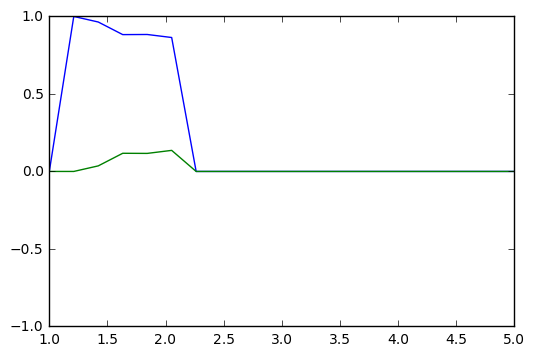

In [29]:
from matplotlib import pyplot as plt
print y1s
print y2s
plt.axis((1,5,-1.0,1.0))
plt.plot(temps,y1s)
plt.plot(temps,y2s)
plt.show()

Tc is about 2.3

# Problem Z

Comment on the amount of time this assignment required.

About 12 hours, I think the error is in my toy model, but I didn't have time to fix it